## Evaluation of the Scrape Results
### Basic Search, Netmums, Blurbs/Titles only (not entire threads)

#### TODO
* count number of results for each of the four subcategories of products

* count for each concern

* count for each pair.

* ^^ to do this first we have to join queries and remove duplicate results. 

### Concerns

["Chemical contaminants",
"Endocrine disruptor",
"preservatives",
"sweeteners",
"additives",
"Pesticides",
"Veterinary drugs",
"GMO",
"Metals",
"Mycotoxin",
"Bisphenol A",
"Furan and furan-like molecules",
"DON",
"Dioxin and PCB",
"MOH",
"Mineral oil hydrocarbons",
"MOSH",
"MOAH",
"Nitrates",
"Acrylamid",
"Phtalates",
"Microbiologic contaminants",
"Salmonella",
"Campylobacter",
"Listeria",
"EColi",
"Cronobacter",
"Histamine",
"Other bacteria",
"Virus",
"Parasites"


### foods 
* infant formula

"formula","baby formula",

* sterizlized vegetable mixed with fish

"veggie baby food","vegetable baby food",

* fresh fruit puree mildly processed

"fruit puree","fruit baby food",

* infant cereals

"cereal for baby", "cereal"

In [4]:
import pickle as pk
from pathlib import Path #easier compatibility btwn different filesystems

In [19]:
import os
os.chdir(Path('/Users/sma/Documents/INRAE internship/scrape-git/netmums/nbks'))

In [20]:
mydict = pk.load(open(Path('../basicblurbs.pkl'),'rb'))

In [ ]:
mydict.keys

In [26]:
mydict.keys()

['https://www.netmums.com/search/chat/Chemical contaminants formula',
 'https://www.netmums.com/search/chat/Chemical contaminants baby formula',
 'https://www.netmums.com/search/chat/Chemical contaminants veggie baby food',
 'https://www.netmums.com/search/chat/Chemical contaminants vegetable baby food',
 'https://www.netmums.com/search/chat/Chemical contaminants fruit puree',
 'https://www.netmums.com/search/chat/Chemical contaminants fruit baby food',
 'https://www.netmums.com/search/chat/Chemical contaminants cereal for baby',
 'https://www.netmums.com/search/chat/Chemical contaminants cereal',
 'https://www.netmums.com/search/chat/Endocrine disruptor formula',
 'https://www.netmums.com/search/chat/Endocrine disruptor baby formula',
 'https://www.netmums.com/search/chat/Endocrine disruptor veggie baby food',
 'https://www.netmums.com/search/chat/Endocrine disruptor vegetable baby food',
 'https://www.netmums.com/search/chat/Endocrine disruptor fruit puree',
 'https://www.netmums.com

* formula subset: compile and then count.

In [37]:
# get a list of all values with a key containing the word 'formula'
formula_set = [value for key, value in mydict.items() if 'formula' in key]


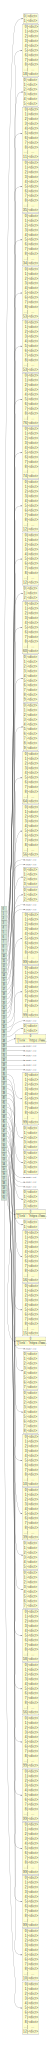

In [43]:
# visualize the structure for ease of understanding the data structure
#requires graphviz
import lolviz
lolviz.lolviz(formula_set)

approx 10 lists are empty.

formula_set is a list of list of dict.

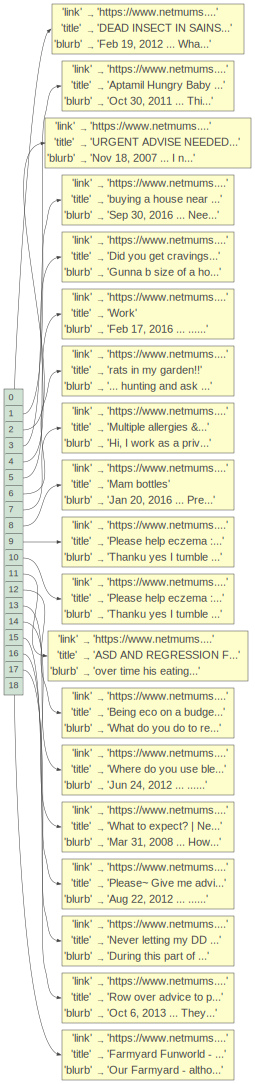

In [48]:
lolviz.objviz(formula_set[1])
#we can see this list of dict contains 18 dicts = 18 results for the query.
#note for larger results objviz will throw an error.
#we can see that formula_set is a list of dicts

the dicts contain three keys: link, title, and blurb.

Blurb is the preview text which was available in the search. We can use this to investigate the quality of our data, seeing how relevant it is to what we wanted to find. (if it is bad, we will try more involved search methods before we go to the step of scraping entire discussions?)

In [67]:
import pandas as pd

In [126]:
#flatten the structure and pass it into a pandas dataframe
formula_df = pd.DataFrame(list([(mydict['link'], mydict['title'], mydict['blurb'] ) for sublist in formula_set for mydict in sublist]),
            columns=["link","title","blurb"])

## Cleaning & Inspection
* remove duplicate results (same exact blurb)
* possibly remove subforums which would be irrelevant topics. (wine, contraception... etc)

In [127]:
#drop duplicates
#duplicates are results with the same blurb, meaning the exact same post in the same thread (title) has been captured.

formula_df = formula_df.drop_duplicates(subset=['blurb','title'])

In [128]:
# number of unique forum threads?
len(pd.unique(formula_df.title))

936

In [134]:
#I noticed that some blurbs are duplicated but have different titles...
formula_df.loc[formula_df.duplicated(subset='blurb', keep=False)].sort_values('blurb')

#It seems that there is an error in my scrape somehow, and so for some of the scrapes it is adding extra junk
#to the title...

#not really a huge issue, but since sometimes it is the subforum name it might interfere with 
#featurization later so I should probably fix it.

# IDEA I can also just drop the title which is longer.
#but I need to check to see if there are other titles which arent dupes which did this..

,link,title,blurb
743,https://www.netmums.com/coffeehouse/drop-clini...,Baby doesnt want milk since starting solids!!,Around 7 last bottle and bed. She loves the so...
695,https://www.netmums.com/coffeehouse/drop-clini...,Weaning Baby doesnt want milk since starting s...,Around 7 last bottle and bed. She loves the so...
1578,https://www.netmums.com/coffeehouse/drop-clini...,"3 month old, ready for baby rice? Help.","As like other mums have stated, throughout the..."
1566,https://www.netmums.com/coffeehouse/drop-clini...,"Weaning 3 month old, ready for baby rice? Help.","As like other mums have stated, throughout the..."
1464,https://www.netmums.com/coffeehouse/drop-clini...,9 Month Baby was sick and now will not drink Milk,"Dec 11, 2009 ... Hi Just wondered if someone c..."
1364,https://www.netmums.com/coffeehouse/drop-clini...,D N28rpv 9 Month Baby was sick and now will no...,"Dec 11, 2009 ... Hi Just wondered if someone c..."
1112,https://www.netmums.com/coffeehouse/drop-clini...,"Help! Baby still has ""colic"" at nearly 5 months !","Dec 18, 2012 ... My DS2 is STILL on colief and..."
1059,https://www.netmums.com/coffeehouse/drop-clini...,"kat27drl Help! Baby still has ""colic"" at nearl...","Dec 18, 2012 ... My DS2 is STILL on colief and..."
1477,https://www.netmums.com/coffeehouse/drop-clini...,baby is ill and won't drink milk - when should...,"Dec 23, 2009 ... hi My 5mth daughter is suffer..."
1401,https://www.netmums.com/coffeehouse/drop-clini...,Breastfeeding baby is ill and won't drink milk...,"Dec 23, 2009 ... hi My 5mth daughter is suffer..."


In [140]:
formula_df.loc[formula_df.duplicated(subset='blurb', keep=False)].sort_values('blurb')[1,1072]

KeyError: (1, 1072)

In [129]:
# number of unique posts?
len(pd.unique(formula_df.blurb))

1167

In [83]:
# What forum area is it located in?
#if we have a lot of results from irrelevant sub-forums that is a bad sign.
temp_links = formula_df.link

In [84]:
temp_links[1]

'https://www.netmums.com/coffeehouse/becoming-mum-pregnancy-996/preparing-baby-870/1446482-mam-bottles.html'

In [86]:
import re

In [117]:
#using regex we extract the forum and subforum names.
# and add them to our existing df.

formula_df = \
pd.concat([formula_df,
    formula_df.link.str.extract('https:\/\/www.netmums.com\/coffeehouse\/(?P<forum>[a-z\-0-9]+)\/(?P<subforum>[a-z\-0-9]+)'
                               )
          ], axis=1
    )

<AxesSubplot:>

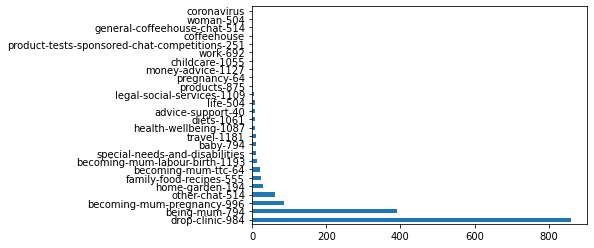

In [118]:
formula_df.forum.value_counts().plot.barh()

The results seem to be from relevant subforums for the most part. We may want to get more results from the 'product' subforum by doing PHP search limited to that subforum.

We should consider dropping results that come from subforums which aren't related to feeding babies, such as Home-Garden, Work, Woman, Legal, Travel.

<AxesSubplot:>

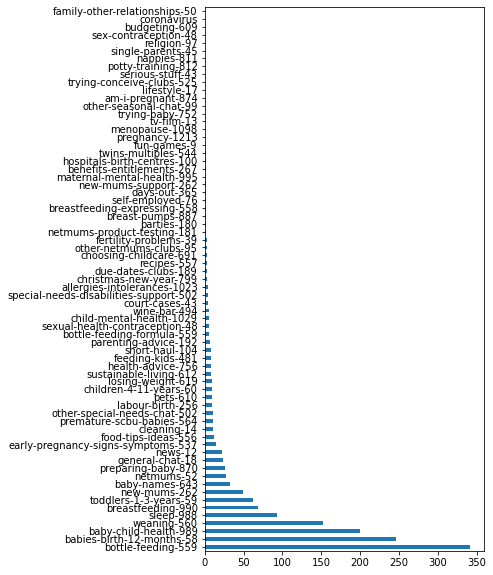

In [119]:
formula_df.subforum.value_counts().plot.barh(figsize=(5,10))

Most our results come from bottle-feeding forum which is a good sign we are capturing relevant conversation on baby formula.

We may want to drop discussion from forums such as wine, sustainable living(?), contraception, losing weight, fertility problems. We want to focus on health concerns related to the babies. 

True